In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import  roc_curve
from utils import evaluate_classification_model
import tensorflow as tf

2024-03-17 10:43:49.040512: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-17 10:43:50.156749: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/anaconda3/envs/matheus_levy_tensorflow/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda-11.4/lib64:/usr/local/cuda-11.4/lib64:/usr/local/cuda-11.4/lib64:
2024-03-17 10:43:50.156833: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object fil

{'loss': [0.009654277004301548, 0.008297956548631191, 0.00800151377916336, 0.007838349789381027, 0.0076807234436273575, 0.007214958313852549, 0.007064632140100002, 0.006977619603276253, 0.006910631898790598, 0.006852822378277779, 0.006724824663251638, 0.006704444997012615, 0.006689132656902075, 0.0066774943843483925, 0.006659073289483786, 0.006663287058472633, 0.006658288650214672, 0.0066602397710084915, 0.006657801102846861, 0.006641995161771774, 0.00666354363784194, 0.0066481600515544415, 0.006655146833509207], 'auc': [0.6269494891166687, 0.7281592488288879, 0.7602299451828003, 0.7758983969688416, 0.7916616797447205, 0.8262042999267578, 0.8362365365028381, 0.8417700529098511, 0.8460475206375122, 0.8494016528129578, 0.8566168546676636, 0.8582514524459839, 0.8584537506103516, 0.8597797751426697, 0.8602226972579956, 0.8595278859138489, 0.8601177930831909, 0.8602771162986755, 0.860264241695404, 0.8611344695091248, 0.8602995872497559, 0.8609477281570435, 0.860590934753418], 'val_loss': [0

Text(0.5, 1.0, 'Train/Val Loss x Epochs - Global')

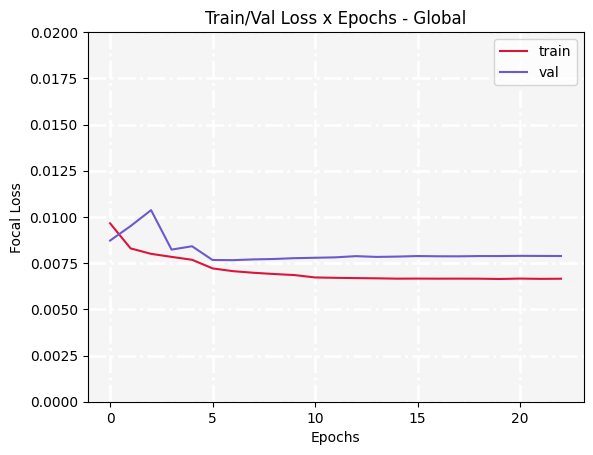

In [2]:
with open(f"/home/matheus_levy/workspace/lucas/metrics/model_v4/history_global", "rb") as f:
    h = pickle.load(f)
print(h)
plt.xlabel("Epochs")
plt.ylabel("Focal Loss")
plt.gca().set_facecolor("whitesmoke")
plt.grid(color='w', linewidth=2, linestyle='-.')
plt.plot(h['loss'], c='crimson')
plt.plot(h['val_loss'], c='slateblue')
plt.legend(['train', 'val'])
plt.ylim(0.00, 0.02)  # Define o intervalo de 0,1 a 0,9 no eixo y

plt.title("Train/Val Loss x Epochs - Global")

{'loss': [0.009654277004301548, 0.008297956548631191, 0.00800151377916336, 0.007838349789381027, 0.0076807234436273575, 0.007214958313852549, 0.007064632140100002, 0.006977619603276253, 0.006910631898790598, 0.006852822378277779, 0.006724824663251638, 0.006704444997012615, 0.006689132656902075, 0.0066774943843483925, 0.006659073289483786, 0.006663287058472633, 0.006658288650214672, 0.0066602397710084915, 0.006657801102846861, 0.006641995161771774, 0.00666354363784194, 0.0066481600515544415, 0.006655146833509207], 'auc': [0.6269494891166687, 0.7281592488288879, 0.7602299451828003, 0.7758983969688416, 0.7916616797447205, 0.8262042999267578, 0.8362365365028381, 0.8417700529098511, 0.8460475206375122, 0.8494016528129578, 0.8566168546676636, 0.8582514524459839, 0.8584537506103516, 0.8597797751426697, 0.8602226972579956, 0.8595278859138489, 0.8601177930831909, 0.8602771162986755, 0.860264241695404, 0.8611344695091248, 0.8602995872497559, 0.8609477281570435, 0.860590934753418], 'val_loss': [0

Text(0.5, 1.0, 'Train/Val AUC x Epochs - Global')

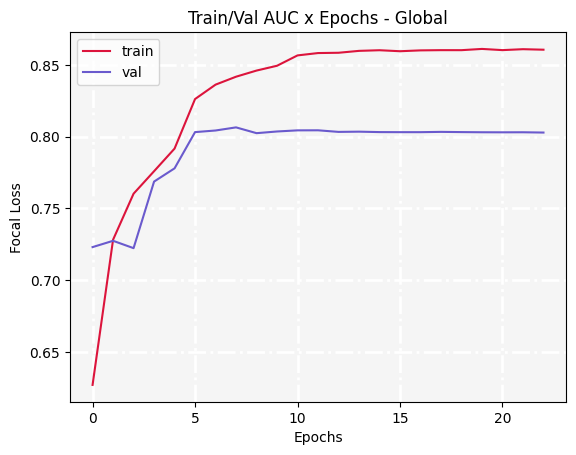

In [3]:
with open(f"/home/matheus_levy/workspace/lucas/metrics/model_v4/history_global", "rb") as f:
    h = pickle.load(f)
print(h)
plt.xlabel("Epochs")
plt.ylabel("Focal Loss")
plt.gca().set_facecolor("whitesmoke")
plt.grid(color='w', linewidth=2, linestyle='-.')
plt.plot(h['auc'], c='crimson')
plt.plot(h['val_auc'], c='slateblue')
plt.legend(['train', 'val'])
# plt.ylim(0.06, 0.1)  # Define o intervalo de 0,1 a 0,9 no eixo y

plt.title("Train/Val AUC x Epochs - Global")

In [4]:
def plot_roc_curve(path, title):
    with open(path, "rb") as f:
        var = pickle.load(f)
    plt.figure(figsize=(10, 8))
    for i in range(len(var['labels'])):
        fpr, tpr, _ = roc_curve(var['groun_truth'][:, i], var['predictions'][:, i])
        plt.plot(fpr, tpr, label=var['labels'][i] + ' (AUC = {:.2f})'.format(var['auc_scores'][i]))
    print(f"Auc-Macro = {var['auc_macro']}")
    print(f"Auc-Micro = {var['auc_micro']}")
    print(f"Auc-Weighted = {var['auc_weighted']}")
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivos')
    plt.title(f'Curva ROC para cada classe: {title}')
    plt.legend()

    # Exibindo o gráfico
    plt.show()

Auc-Macro = 0.8160681209158299
Auc-Micro = 0.8720292825479474
Auc-Weighted = 0.7885991741740161


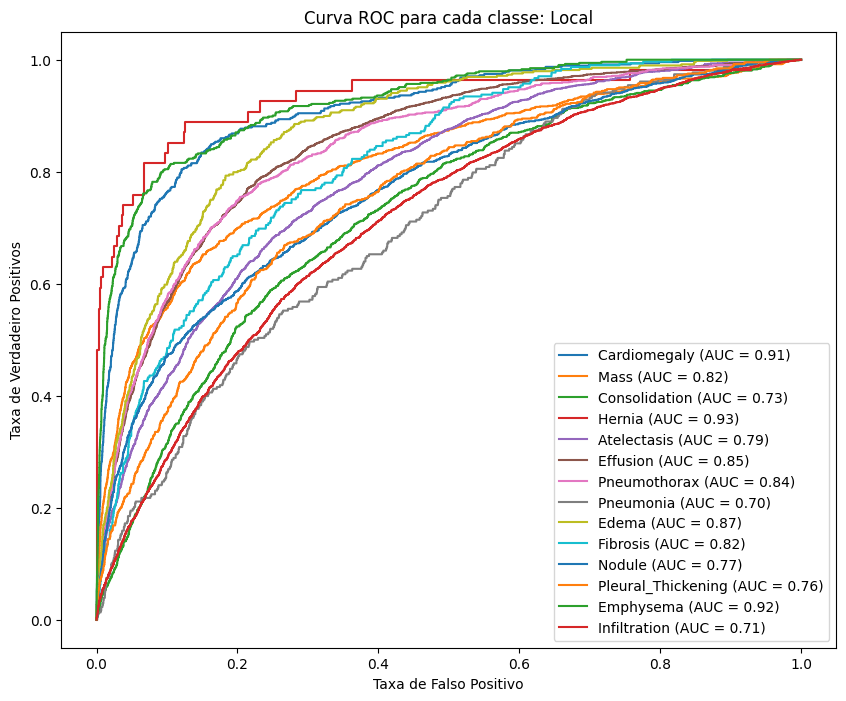

In [5]:
plot_roc_curve('/home/matheus_levy/workspace/lucas/metrics/model_v4/metrics_global_v4', "Local")